# KNN Regressor

In [30]:
#import dataset
import pandas as pd
import numpy as np
import seaborn as sb
import warnings as wr
wr.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
#importing our dataset.
weight_height=pd.read_csv('weight-height.csv')

In [3]:
#copy dataset
weight_height1=weight_height

In [123]:
# show datasite head 5 rows 
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Encoding

In [124]:
#Label Encoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [125]:
for dataset in weight_height.columns:
    if is_numeric_dtype(weight_height[dataset]):
        continue
    else:
        weight_height[dataset]=le.fit_transform(weight_height[dataset])

In [126]:
#Splitting the dataset
x = weight_height.drop('Weight',axis=1)
y = weight_height[['Weight']]

# LinearRegression

In [131]:
#importing ML Algorithm
from sklearn.model_selection import train_test_split as ts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [128]:
#data testing and training
xtrain,xtest,ytrain,ytest=ts(x,y,train_size=.70,random_state=1)

In [129]:
#crate object
lr=LinearRegression()

In [61]:
#Training the Model
lr.fit(xtrain,ytrain)

LinearRegression()

In [62]:
#predicted value
lr.predict([[1,73.847017]])

array([[215.5743523]])

In [63]:
#predicted test
ypred=lr.predict(xtest)

In [64]:
#Finding Mean Square error
mean_squared_error(ytest,ypred)

99.67250998070031

In [65]:
#finding Mean Absolute error
mean_absolute_error(ytest,ypred)

7.982132592729128

In [66]:
lr.score(xtest,ytest) # testing score

0.9059959607091161

In [67]:
lr.score(xtrain,ytrain) # traing score

0.8972135459668117

# KNeighborsRegressor

In [74]:
#importing ML Algorithm
from sklearn.neighbors import KNeighborsRegressor

In [75]:
#crate object
kr=KNeighborsRegressor()

In [76]:
#Training the Model
kr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [73]:
#predicted value
kr.predict([[1,73.847017]])

array([[222.24972316]])

In [77]:
#predicted test
ypred=lr.predict(xtest)

In [78]:
#Finding Mean Square error
mean_squared_error(ytest,ypred)

99.67250998070031

In [79]:
#finding Mean Absolute error
mean_absolute_error(ytest,ypred)

7.982132592729128

In [80]:
kr.score(xtrain,ytrain) # traing score

0.9170756955071054

In [81]:
kr.score(xtest,ytest) # testing score

0.8838502073708883

# RandomizedSearchCV

In [83]:
tree = np.random.randint(10,100,30)

In [85]:
weights = ['uniform','distance']
leaf_size = np.random.randint(1,10,15)
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [86]:
ids={'n_neighbors':tree,'weights':weights,'leaf_size':leaf_size,'algorithm':algorithm}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
rscv=RandomizedSearchCV(kr,ids,n_jobs=20,cv=3)

In [89]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=20,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([3, 5, 2, 9, 2, 2, 8, 9, 2, 8, 7, 8, 3, 6, 8]),
                                        'n_neighbors': array([34, 62, 99, 79, 28, 66, 29, 16, 34, 78, 86, 87, 33, 39, 55, 52, 25,
       81, 40, 10, 57, 65, 63, 53, 79, 78, 90, 70, 54, 26]),
                                        'weights': ['uniform', 'distance']})

In [95]:
rscv.best_params_

{'weights': 'uniform',
 'n_neighbors': 53,
 'leaf_size': 9,
 'algorithm': 'ball_tree'}

In [96]:
rscv.best_score_

0.8937044022017301

In [109]:
#predicted value
rscv.predict([[1,73.847017]])

array([[215.71584452]])

In [110]:
#Finding Mean Square error
mean_squared_error(ytest,ypred)

99.67250998070031

In [97]:
kr.score(xtrain,ytrain) # KNeighborsRegressor score

0.9170756955071054

In [105]:
rscv.score(xtrain,ytrain) # RandomizedSearchCV

0.8973892273137252

In [98]:
kr.score(xtest,ytest) # KNeighborsRegressor score

0.8838502073708883

In [106]:
rscv.score(xtest,ytest) # RandomizedSearchCV

0.9035963500209616

In [99]:
cv_result = pd.DataFrame(rscv.cv_results_)

In [100]:
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011298,0.000471,0.094613,0.044728,distance,54,8,kd_tree,"{'weights': 'distance', 'n_neighbors': 54, 'le...",0.876785,0.876692,0.883754,0.879077,0.003307,9
1,0.005995,0.000002,1.421188,0.025651,distance,63,5,brute,"{'weights': 'distance', 'n_neighbors': 63, 'le...",0.877288,0.876994,0.884154,0.879479,0.003308,7
2,0.011648,0.000483,0.255523,0.072632,uniform,87,8,auto,"{'weights': 'uniform', 'n_neighbors': 87, 'lea...",0.891076,0.888438,0.896880,0.892131,0.003526,5
3,0.013325,0.000942,0.118935,0.021452,distance,57,8,kd_tree,"{'weights': 'distance', 'n_neighbors': 57, 'le...",0.876943,0.876833,0.883927,0.879234,0.003318,8
4,0.012992,0.001413,0.072959,0.010670,distance,33,8,kd_tree,"{'weights': 'distance', 'n_neighbors': 33, 'le...",0.874824,0.874974,0.881851,0.877216,0.003278,10


In [101]:
rscv2=rscv.best_estimator_

In [102]:
rscv2.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=9, n_neighbors=53)

In [107]:
rscv2.score(xtest,ytest) # new RandomizedSearchCV

0.9035963500209616

In [108]:
rscv2.score(xtrain,ytrain) # new RandomizedSearchCV

0.8973892273137252

# KNN Classifier

In [116]:
weight_height1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [32]:
#importing ML Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [5]:
x2=weight_height1.drop('Gender',axis=1)
y2=weight_height1[['Gender']]

In [6]:
#data testing and training
x2train,x2test,y2train,y2test=train_test_split(x2,y2,train_size=.70,random_state=1)

In [13]:
knc=KNeighborsClassifier() # #crate object

In [14]:
knc.fit(x2train,y2train) # #Training the Model

KNeighborsClassifier()

In [10]:
knc.score(x2train,y2train) # traing score

0.9263527054108216

In [12]:
knc.score(x2test,y2test) # testing score

0.9146864043630697

In [16]:
ypred=knc.predict(x2test) # testing predicted values

In [19]:
print(classification_report(y2test,ypred)) # # print classification_report

              precision    recall  f1-score   support

      Female       0.90      0.89      0.90      1055
        Male       0.92      0.93      0.93      1512

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



In [23]:
confusion_matrix(y2test,ypred) # confusion_matrix values

array([[ 938,  117],
       [ 102, 1410]], dtype=int64)

In [22]:
(938+1410)/(938+117+102+1410) # # confusion_matrix value Accuracy

0.9146864043630697

In [28]:
heatmap=confusion_matrix(y2test,ypred) # confusion_matrix values heatmap

<AxesSubplot:>

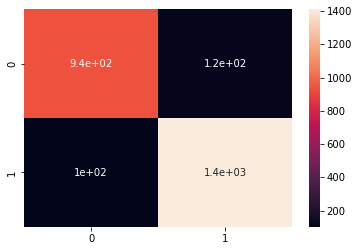

In [29]:
sb.heatmap(heatmap,annot=True) # confusion_matrix values heatmap

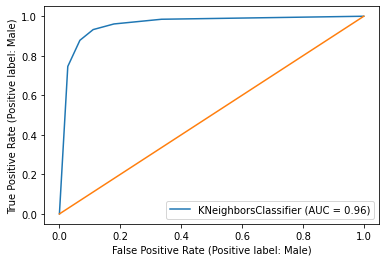

In [33]:
plot_roc_curve(knc,x2test,y2test) # The Area Under the Curve (AUC)
plt.plot([0,1],[0,1])